In [1]:
import os
import yaml
import pandas as pd
import sqlalchemy

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display 
pd.options.display.max_columns = None
%matplotlib inline

def connect(poolclass=sqlalchemy.pool.QueuePool):
    with open(os.path.join(os.path.join('../..','config'), 'donors_db_profile.yaml')) as fd:
        config = yaml.load(fd)
        dburl = sqlalchemy.engine.url.URL(
            "postgres",
            host=config["host"],
            username=config["user"],
            database=config["db"],
            password=config["pass"],
            port=config["port"],
        )
        return sqlalchemy.create_engine(dburl, poolclass=poolclass)

    
conn = connect()

import RecallAdjuster as ra
from importlib import reload
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns

/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


In [2]:
base = datetime.datetime.strptime('2013-03-01', '%Y-%m-%d')   #Corresponding to latest train_end_time\n",
date_pairs = []
for x in range(16, -1, -1):
    date_pairs.append(
        (
        (base - relativedelta(months=2*x) - relativedelta(months=2)).strftime('%Y-%m-%d'),
        (base - relativedelta(months=2*x) - relativedelta(months=2)).strftime('%Y-%m-%d')
        )
    )
    date_pairs.append(
        (
        (base - relativedelta(months=2*x) - relativedelta(months=2)).strftime('%Y-%m-%d'),
        (base - relativedelta(months=2*x)).strftime('%Y-%m-%d')
        )
    )
print(date_pairs)

[('2010-05-01', '2010-05-01'), ('2010-05-01', '2010-07-01'), ('2010-07-01', '2010-07-01'), ('2010-07-01', '2010-09-01'), ('2010-09-01', '2010-09-01'), ('2010-09-01', '2010-11-01'), ('2010-11-01', '2010-11-01'), ('2010-11-01', '2011-01-01'), ('2011-01-01', '2011-01-01'), ('2011-01-01', '2011-03-01'), ('2011-03-01', '2011-03-01'), ('2011-03-01', '2011-05-01'), ('2011-05-01', '2011-05-01'), ('2011-05-01', '2011-07-01'), ('2011-07-01', '2011-07-01'), ('2011-07-01', '2011-09-01'), ('2011-09-01', '2011-09-01'), ('2011-09-01', '2011-11-01'), ('2011-11-01', '2011-11-01'), ('2011-11-01', '2012-01-01'), ('2012-01-01', '2012-01-01'), ('2012-01-01', '2012-03-01'), ('2012-03-01', '2012-03-01'), ('2012-03-01', '2012-05-01'), ('2012-05-01', '2012-05-01'), ('2012-05-01', '2012-07-01'), ('2012-07-01', '2012-07-01'), ('2012-07-01', '2012-09-01'), ('2012-09-01', '2012-09-01'), ('2012-09-01', '2012-11-01'), ('2012-11-01', '2012-11-01'), ('2012-11-01', '2013-01-01'), ('2013-01-01', '2013-01-01'), ('2013-01

In [3]:
import SAVE_RecallAdjuster as sra
from jinja2 import Template
import time

In [4]:
conn.dispose()
conn = connect()
reload(sra)

/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


<module 'SAVE_RecallAdjuster' from '/mnt/data/users/hemank/peeps-chili/code_2/education_crowdsourcing/SAVE_RecallAdjuster.py'>

In [8]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='donors_bias_under_1_orig_orig',
        experiment_hashes='a4bf9cbc91636017f7261a4008fb4142',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment

SET ROLE hemank;

CREATE SCHEMA IF NOT EXISTS donors_bias_under_1_orig_orig;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort

DROP TABLE IF EXISTS donors_bias_under_1_orig_orig.tmp_bias_end_times;
CREATE TABLE donors_bias_under_1_orig_orig.tmp_bias_end_times
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','201

In [9]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='donors_bias_under_orig_50_50',
        experiment_hashes='78003ff2591febd2ddd5b66c2a40a376',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment

SET ROLE hemank;

CREATE SCHEMA IF NOT EXISTS donors_bias_under_orig_50_50;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort

DROP TABLE IF EXISTS donors_bias_under_orig_50_50.tmp_bias_end_times;
CREATE TABLE donors_bias_under_orig_50_50.tmp_bias_end_times
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-0

In [10]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='donors_bias_under_orig_50_orig',
        experiment_hashes='f39fdc1f199f7197c33dd97729c30587',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment

SET ROLE hemank;

CREATE SCHEMA IF NOT EXISTS donors_bias_under_orig_50_orig;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort

DROP TABLE IF EXISTS donors_bias_under_orig_50_orig.tmp_bias_end_times;
CREATE TABLE donors_bias_under_orig_50_orig.tmp_bias_end_times
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','

In [12]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='donors_bias_orig_snop_orig',
        experiment_hashes='072c8001ed06f6c40725b8ec7f4766c2',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment

SET ROLE hemank;

CREATE SCHEMA IF NOT EXISTS donors_bias_orig_snop_orig;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort

DROP TABLE IF EXISTS donors_bias_orig_snop_orig.tmp_bias_end_times;
CREATE TABLE donors_bias_orig_snop_orig.tmp_bias_end_times
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01',

In [13]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='donors_bias_under_1_50_50',
        experiment_hashes='0de125d2f18da08a0cc47965fbf26c34',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment

SET ROLE hemank;

CREATE SCHEMA IF NOT EXISTS donors_bias_under_1_50_50;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort

DROP TABLE IF EXISTS donors_bias_under_1_50_50.tmp_bias_end_times;
CREATE TABLE donors_bias_under_1_50_50.tmp_bias_end_times
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','20

In [14]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='donors_bias_under_1_snop_orig',
        experiment_hashes='585f893d800daa42f49b40f7bc8fb7c8',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment

SET ROLE hemank;

CREATE SCHEMA IF NOT EXISTS donors_bias_under_1_snop_orig;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort

DROP TABLE IF EXISTS donors_bias_under_1_snop_orig.tmp_bias_end_times;
CREATE TABLE donors_bias_under_1_snop_orig.tmp_bias_end_times
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','201

In [39]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='donors_bias_over_1_orig_orig',
        experiment_hashes='3df029a03f24c7ee757e059ee7408111',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment

SET ROLE hemank;

CREATE SCHEMA IF NOT EXISTS donors_bias_over_1_orig_orig;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort

DROP TABLE IF EXISTS donors_bias_over_1_orig_orig.tmp_bias_end_times;
CREATE TABLE donors_bias_over_1_orig_orig.tmp_bias_end_times
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-0

In [40]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='donors_bias_over_orig_50_50',
        experiment_hashes='00641e9c873e781426b851cc1c353d91',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment

SET ROLE hemank;

CREATE SCHEMA IF NOT EXISTS donors_bias_over_orig_50_50;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort

DROP TABLE IF EXISTS donors_bias_over_orig_50_50.tmp_bias_end_times;
CREATE TABLE donors_bias_over_orig_50_50.tmp_bias_end_times
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-0

In [41]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='donors_bias_over_orig_50_orig',
        experiment_hashes='20f0b464acc172e7aa64927bd52666c8',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment

SET ROLE hemank;

CREATE SCHEMA IF NOT EXISTS donors_bias_over_orig_50_orig;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort

DROP TABLE IF EXISTS donors_bias_over_orig_50_orig.tmp_bias_end_times;
CREATE TABLE donors_bias_over_orig_50_orig.tmp_bias_end_times
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','201

In [42]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='donors_bias_over_orig_snop_orig',
        experiment_hashes='e0811375bd4df985dee9d02dbecaf98b',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment

SET ROLE hemank;

CREATE SCHEMA IF NOT EXISTS donors_bias_over_orig_snop_orig;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort

DROP TABLE IF EXISTS donors_bias_over_orig_snop_orig.tmp_bias_end_times;
CREATE TABLE donors_bias_over_orig_snop_orig.tmp_bias_end_times
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01

In [43]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='donors_bias_over_1_50_50',
        experiment_hashes='fd5d66b37e71b1144ffd050bceb9d876',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment

SET ROLE hemank;

CREATE SCHEMA IF NOT EXISTS donors_bias_over_1_50_50;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort

DROP TABLE IF EXISTS donors_bias_over_1_50_50.tmp_bias_end_times;
CREATE TABLE donors_bias_over_1_50_50.tmp_bias_end_times
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-

In [44]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='donors_bias_over_1_snop_orig',
        experiment_hashes='0d063594033baeccf1889e6be7708137',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment

SET ROLE hemank;

CREATE SCHEMA IF NOT EXISTS donors_bias_over_1_snop_orig;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort

DROP TABLE IF EXISTS donors_bias_over_1_snop_orig.tmp_bias_end_times;
CREATE TABLE donors_bias_over_1_snop_orig.tmp_bias_end_times
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-0

### Decoupled

In [94]:
conn.dispose()
conn = connect()
reload(sra)

/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


<module 'SAVE_RecallAdjuster' from '/mnt/data/users/hemank/peeps-chili/code_2/education_crowdsourcing/SAVE_RecallAdjuster.py'>

In [96]:
myRA_decoupled = sra.RecallAdjuster(
        engine=conn,
        pg_role='rg_staff',
        schema='donors_bias_decoupled',
        experiment_hashes='10ec0614881ab8f1d97754c863e39fd3',
        date_pairs=date_pairs,
        list_sizes=[500],
        #entity_demos='joco',
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        decoupled_experiments=[
            ('4fcb39da1328adf4e162f1e01f226745', 'highest'), 
            ('36623fcacc16535159a0f9e2bf11c9e2', 'not_highest')],
        decoupled_entity_demos='hemank_bias_original.entity_demos3',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)

Dates validated
Running Donors Pre-Recall Adjustment

SET ROLE rg_staff;

CREATE SCHEMA IF NOT EXISTS donors_bias_decoupled;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort

DROP TABLE IF EXISTS donors_bias_decoupled.tmp_bias_end_times;
CREATE TABLE donors_bias_decoupled.tmp_bias_end_times
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01',

In [5]:
query = Template("""
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM {{schema}}.model_adjustment_results_plevel
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)

-- Simple model selection on last time period, baseline with no recall adjustments
SELECT 'Best Unadjusted Metric - Unadjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.base_value AS value,
       r.base_max_recall_ratio AS max_recall_ratio,
       r.base_recall_highest_to_not_highest AS recall_high_to_not_high,
       r.base_recall_not_highest_to_highest AS recall_not_high_to_high
FROM {{schema}}.model_adjustment_results_plevel r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time before adjustment, with adjustment applied
SELECT 'Best Unadjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_highest_to_not_highest AS recall_high_to_not_high,
       r.adj_recall_not_highest_to_highest AS recall_not_high_to_high
FROM {{schema}}.model_adjustment_results_plevel r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time after adjustment, with adjustment applied
SELECT 'Best Adjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_highest_to_not_highest AS recall_high_to_not_high,
       r.adj_recall_not_highest_to_highest AS recall_not_high_to_high
FROM {{schema}}.model_adjustment_results_plevel r
JOIN adj_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Composite model
SELECT 'Composite Model - Adjusted'::VARCHAR(128) AS strategy,
      r.train_end_time AS train_end_time,
      r.past_train_end_time AS past_train_end_time,
      r.list_size, metric, parameter,
      r.value AS value,
      r.max_recall_ratio AS max_recall_ratio,
      r.recall_highest_to_not_highest AS recall_high_to_not_high,
      r.recall_not_highest_to_highest AS recall_not_high_to_high
FROM {{schema}}.composite_results_plevel r
WHERE train_end_time > past_train_end_time;
""")

In [6]:
query_decoupled = Template("""
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM {{schema}}.model_adjustment_results_plevel
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)

SELECT 'Composite w/ Decoupled - Adjusted'::VARCHAR(128) AS strategy,
      train_end_time, past_train_end_time,
      list_size, metric, parameter,
      value,
      max_recall_ratio,
      recall_highest_to_not_highest AS recall_high_to_not_high,
      recall_not_highest_to_highest AS recall_not_high_to_high
FROM {{schema}}.composite_results_decoupled_plevel
WHERE train_end_time > past_train_end_time
;
""")

In [7]:
params = {}
params['schema'] = 'hemank_bias_aug24_original'
sql_orig = query.render(**params)
ts_df_orig = pd.read_sql(sql_orig, conn)

params = {}
params['schema'] = 'hemank_bias_aug24_nop'
sql_nop = query.render(**params)
ts_df_nop = pd.read_sql(sql_nop, conn)

params = {}
params['schema'] = 'donors_bias_decoupled'
sql_decoupled = query_decoupled.render(**params)
ts_df_decoupled = pd.read_sql(sql_decoupled, conn)

params = {}
params['schema'] = 'donors_bias_zafar'
sql_zafar = query.render(**params)
ts_df_zafar = pd.read_sql(sql_zafar, conn)

In [9]:
params = {}
params['schema'] = 'donors_bias_under_1_orig_orig'
sql_u_v1a = query.render(**params)
ts_df_u_v1a = pd.read_sql(sql_u_v1a, conn)

params = {}
params['schema'] = 'donors_bias_under_orig_50_50'
sql_u_v2a = query.render(**params)
ts_df_u_v2a = pd.read_sql(sql_u_v2a, conn)

params = {}
params['schema'] = 'donors_bias_under_orig_snop_orig'
sql_u_v2b = query.render(**params)
ts_df_u_v2b = pd.read_sql(sql_u_v2b, conn)

params = {}
params['schema'] = 'donors_bias_under_orig_50_orig'
sql_u_v2c = query.render(**params)
ts_df_u_v2c = pd.read_sql(sql_u_v2c, conn)

params = {}
params['schema'] = 'donors_bias_under_1_50_50'
sql_u_v3a = query.render(**params)
ts_df_u_v3a = pd.read_sql(sql_u_v3a, conn)

params = {}
params['schema'] = 'donors_bias_under_1_snop_orig'
sql_u_v3b = query.render(**params)
ts_df_u_v3b = pd.read_sql(sql_u_v3b, conn)


params = {}
params['schema'] = 'donors_bias_over_1_orig_orig'
sql_o_v1a = query.render(**params)
ts_df_o_v1a = pd.read_sql(sql_o_v1a, conn)

params = {}
params['schema'] = 'donors_bias_over_orig_50_50'
sql_o_v2a = query.render(**params)
ts_df_o_v2a = pd.read_sql(sql_o_v2a, conn)

params = {}
params['schema'] = 'donors_bias_over_orig_snop_orig'
sql_o_v2b = query.render(**params)
ts_df_o_v2b = pd.read_sql(sql_o_v2b, conn)

params = {}
params['schema'] = 'donors_bias_over_orig_50_orig'
sql_o_v2c = query.render(**params)
ts_df_o_v2c = pd.read_sql(sql_o_v2c, conn)

params = {}
params['schema'] = 'donors_bias_over_1_50_50'
sql_o_v3a = query.render(**params)
ts_df_o_v3a = pd.read_sql(sql_o_v3a, conn)

params = {}
params['schema'] = 'donors_bias_over_1_snop_orig'
sql_o_v3b = query.render(**params)
ts_df_o_v3b = pd.read_sql(sql_o_v3b, conn)

params = {}
params['schema'] = 'donors_bias_zafar'
sql_zafar = query.render(**params)
ts_df_zafar = pd.read_sql(sql_zafar, conn)

In [10]:
ts_df_orig['dataset'] = 'Original'
orig_df = ts_df_orig.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_nop['dataset'] = 'NoP'
nop_df = ts_df_nop.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_decoupled['dataset'] = 'Decoupled'
decoupled_df = ts_df_decoupled.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns'
)

ts_df_u_v1a['dataset'] = 'Under-v1a'
u_v1a_df = ts_df_u_v1a.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_u_v2a['dataset'] = 'Under-v2a'
u_v2a_df = ts_df_u_v2a.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_u_v2b['dataset'] = 'Under-v2b'
u_v2b_df = ts_df_u_v2b.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_u_v2c['dataset'] = 'Under-v2c'
u_v2c_df = ts_df_u_v2c.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_u_v3a['dataset'] = 'Under-v3a'
u_v3a_df = ts_df_u_v3a.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_u_v3b['dataset'] = 'Under-v3b'
u_v3b_df = ts_df_u_v3b.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_o_v1a['dataset'] = 'Over-v1a'
o_v1a_df = ts_df_o_v1a.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_o_v2a['dataset'] = 'Over-v2a'
o_v2a_df = ts_df_o_v2a.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_o_v2b['dataset'] = 'Over-v2b'
o_v2b_df = ts_df_o_v2b.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_o_v2c['dataset'] = 'Over-v2c'
o_v2c_df = ts_df_o_v2c.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_o_v3a['dataset'] = 'Over-v3a'
o_v3a_df = ts_df_o_v3a.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_o_v3b['dataset'] = 'Over-v3b'
o_v3b_df = ts_df_o_v3b.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_zafar['dataset'] = 'Zafar'
zafar_df = ts_df_zafar.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

In [11]:
all_df = pd.concat([orig_df, nop_df, zafar_df, decoupled_df])
under_df = pd.concat([orig_df, u_v1a_df, u_v2a_df, u_v2b_df, u_v2c_df, u_v3a_df, u_v3b_df])
over_df = pd.concat([orig_df, o_v1a_df, o_v2a_df, o_v2b_df, o_v2c_df, o_v3a_df, o_v3b_df])

In [12]:
all_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()

,dataset,strategy,value,recall_disp
0,Decoupled,Composite w/ Decoupled - Adjusted,0.571176,0.988220
1,NoP,Best Adjusted Metric - Adjusted,0.548242,0.985605
2,NoP,Best Unadjusted Metric - Adjusted,0.550970,0.983834
3,NoP,Best Unadjusted Metric - Unadjusted,0.553121,1.383170
4,NoP,Composite Model - Adjusted,0.545000,0.999928
5,Original,Best Adjusted Metric - Adjusted,0.546061,0.989317
6,Original,Best Unadjusted Metric - Adjusted,0.557576,0.954643
7,Original,Best Unadjusted Metric - Unadjusted,0.553455,1.858513
8,Original,Composite Model - Adjusted,0.552369,1.010704
9,Zafar,Best Adjusted Metric - Adjusted,0.549323,0.998656


In [18]:
under_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()

,dataset,strategy,value,recall_disp
0,Original,Best Adjusted Metric - Adjusted,0.546061,0.989317
1,Original,Best Unadjusted Metric - Adjusted,0.557576,0.954643
2,Original,Best Unadjusted Metric - Unadjusted,0.553455,1.858513
3,Original,Composite Model - Adjusted,0.552369,1.010704
4,Under-v1a,Best Adjusted Metric - Adjusted,0.537606,1.007370
5,Under-v1a,Best Unadjusted Metric - Adjusted,0.541636,0.988546
6,Under-v1a,Best Unadjusted Metric - Unadjusted,0.543727,1.707765
7,Under-v1a,Composite Model - Adjusted,0.539735,1.014735
8,Under-v2a,Best Adjusted Metric - Adjusted,0.543242,1.018201
9,Under-v2a,Best Unadjusted Metric - Adjusted,0.539364,0.987759


In [19]:
over_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()

,dataset,strategy,value,recall_disp
0,Original,Best Adjusted Metric - Adjusted,0.546061,0.989317
1,Original,Best Unadjusted Metric - Adjusted,0.557576,0.954643
2,Original,Best Unadjusted Metric - Unadjusted,0.553455,1.858513
3,Original,Composite Model - Adjusted,0.552369,1.010704
4,Over-v1a,Best Adjusted Metric - Adjusted,0.537848,0.980641
5,Over-v1a,Best Unadjusted Metric - Adjusted,0.537667,0.966857
6,Over-v1a,Best Unadjusted Metric - Unadjusted,0.539697,1.972860
7,Over-v1a,Composite Model - Adjusted,0.535471,1.034048
8,Over-v2a,Best Adjusted Metric - Adjusted,0.532242,0.989526
9,Over-v2a,Best Unadjusted Metric - Adjusted,0.523333,0.968658


In [13]:
def plot(comp_df):
    colorlist = sns.color_palette("dark", 12).as_hex()
    fig, ax = plt.subplots(figsize=(12, 5))
    
    data = comp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()
    
    sns.lineplot(data = data,
                 x='value', y='recall_disp',
                 hue = 'dataset',
                 style = 'strategy',
                 markers = True,
                 color = colorlist,
                 markersize = 10,
                 dashes = None,
                 ci = None,
                 ax = ax)
    
    unique_dfs = np.unique(data['dataset'])
    
    for i in range(len(unique_dfs)):
        tmp_df = comp_df.loc[comp_df['dataset'] == unique_dfs[i], ].copy()
        
        x_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['value'].values)
        y_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['recall_disp'].values)
        
        prec_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['value'].sem().values
        disp_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['recall_disp'].sem().values
        
        color = colorlist[i]
        
        ax.errorbar(x_coords, y_coords,
                   xerr = prec_errors,
                   yerr = disp_errors,
                   ecolor = colorlist[i], fmt= ' ', zorder=-1, capsize=5)
        
    ax.set_ylabel('Recall Disparity', fontsize=16)
    ax.set_xlabel('Precision at Top-K', fontsize=16)
    
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    
    handles, labels = ax.get_legend_handles_labels()
    hhandles = []
    llabels = []
    for i, lab in enumerate(labels):
        if lab not in list(unique_dfs) + ['dataset', 'strategy']:
            handles[i].set_linestyle("")
        hhandles.append(handles[i])
        llabels.append(lab)
        
    ax.legend(hhandles, llabels, fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., markerscale=2)
    ax.set_ylim([0.5, 2.5])
    fig.tight_layout()

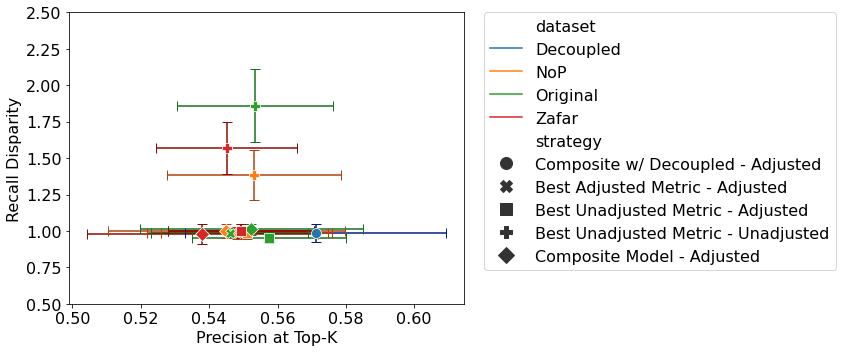

In [15]:
import numpy as np
plot(all_df)

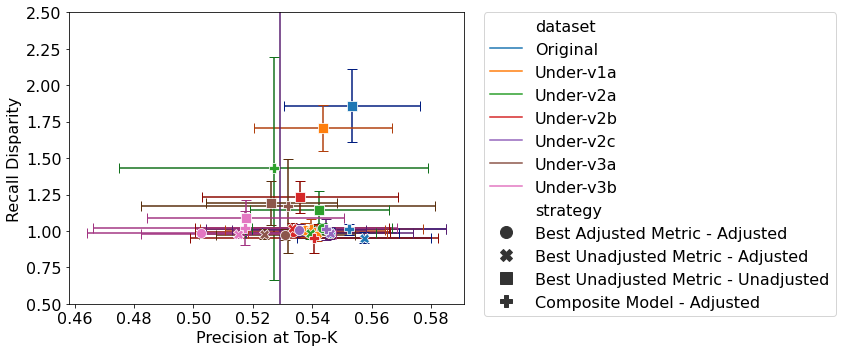

In [16]:
plot(under_df)

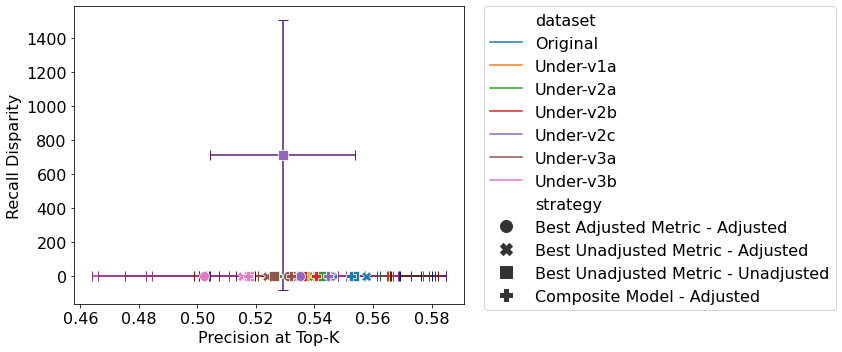

In [74]:
plot(under_df)

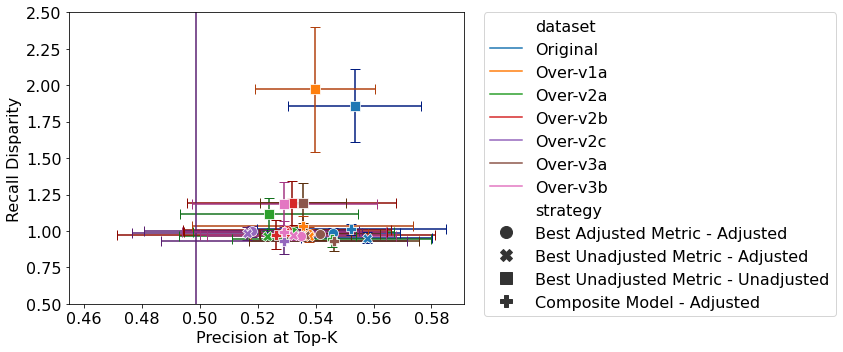

In [17]:
plot(over_df)

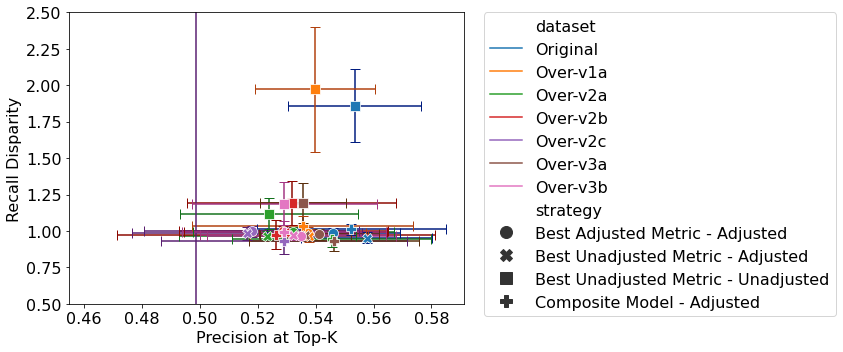

In [20]:
def to_pickle(df, name):
    df.to_pickle('/mnt/data/experiment_data/donors2/SAVED_DFS/'+str(name)+'.pkl')
    
to_pickle(orig_df, 'orig_df')
to_pickle(nop_df, 'nop_df')
to_pickle(decoupled_df, 'decoupled_df')
to_pickle(zafar_df, 'zafar_df')

to_pickle(u_v1a_df, 'u_v1a_df')
to_pickle(u_v2a_df, 'u_v2a_df')
to_pickle(u_v2b_df, 'u_v2b_df')
to_pickle(u_v2c_df, 'u_v2c_df')
to_pickle(u_v3a_df, 'u_v3a_df')
to_pickle(u_v3b_df, 'u_v3b_df')

to_pickle(o_v1a_df, 'o_v1a_df')
to_pickle(o_v2a_df, 'o_v2a_df')
to_pickle(o_v2b_df, 'o_v2b_df')
to_pickle(o_v2c_df, 'o_v2c_df')
to_pickle(o_v3a_df, 'o_v3a_df')
to_pickle(o_v3b_df, 'o_v3b_df')

In [78]:
sdetails = pd.read_csv('/mnt/data/experiment_data/donors2/SAMPLING_DETAILS_DATAFRAME.csv')

In [84]:
sdetails[(sdetails['mode']=='under') & (sdetails['ratio_protected']=='original') & 
         (sdetails['ldist_p'] == '50') & (sdetails['ldist_np']=='original')].sort_values(by=['min_as_of_date'])

,Unnamed: 0,mode,ratio_protected,ldist_p,ldist_np,min_as_of_date,max_as_of_date,train_matrix_id,test_matrix_id,orig_p_l0,orig_p_l1,orig_np_l0,orig_np_l1,sampled_p_l0,sampled_p_l1,sampled_np_l0,sampled_np_l1
108,108,under,original,50,original,2010-01-01,2010-01-01,6ea6c58c28501d10aaf50202b243a9f7,888951448122ab5f23bb4dec919fac9d,28.0,8.0,101.0,16.0,8,8,44,8
109,109,under,original,50,original,2010-01-01,2010-03-01,0e9de687ca970c639bb23be5034b7f2c,bef435dff15cda7b3553224144f5d5ef,2683.0,1373.0,5630.0,1573.0,1373,1373,3811,1065
110,110,under,original,50,original,2010-01-01,2010-05-01,131808610ec7f816bdef66f51c5ab82b,3c203d35ae0badb00d90b6100dd4c389,5172.0,2898.0,10354.0,3748.0,2898,2898,7436,2692
111,111,under,original,50,original,2010-01-01,2010-07-01,b3402aed390dd3164322542d3464bf47,5b578fdabbbfc88b716a2b34de0798b3,6992.0,4172.0,13365.0,5249.0,4172,4172,9988,3924
112,112,under,original,50,original,2010-01-01,2010-09-01,32624107514c0c5d278a0d3ebbb12971,5af89e129cf1707f01e24132ae888f8d,10856.0,5770.0,19767.0,7075.0,5770,5770,13719,4911
113,113,under,original,50,original,2010-01-01,2010-11-01,db013fc66f3ddba0f467e74358225595,21eb398c98ed0ecd2e0d1b4862171c0f,18949.0,8457.0,31464.0,9744.0,8457,8457,19418,6014
114,114,under,original,50,original,2010-01-01,2011-01-01,681a9b0a93e07e2bbd0ca7512d91f0af,8b689a6ff22cc64c89dd3e2083896c83,25031.0,10230.0,39796.0,11544.0,10230,10230,23090,6699
115,115,under,original,50,original,2010-03-01,2011-03-01,5175fc2b8ae850d4834ab3fb4d54eaaf,3de0167ff19b8b6ea6642eabb6e075a8,27968.0,11227.0,42360.0,13116.0,11227,11227,24267,7514
116,116,under,original,50,original,2010-05-01,2011-05-01,1486af0c1ab34b51fb7eb57d75d66915,27aa11c9119d3a13da58c2bb90f455a8,31066.0,12451.0,45392.0,14113.0,12451,12451,25974,8076
117,117,under,original,50,original,2010-07-01,2011-07-01,1f457c4af8cfedb02a00b79d7d04451a,c520eda8449c70c8ed8f803e3c2c6ea5,31189.0,13035.0,45453.0,14991.0,13035,13035,26793,8838


## Re-Running Adjustments -- Making sure the frac is okay.

In [ ]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='donors_bias_zafar',
        experiment_hashes='3df029a03f24c7ee757e059ee7408111',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

In [70]:
import SAVE_RecallAdjuster as sra
from jinja2 import Template
import time

In [71]:
conn.dispose()
conn = connect()
reload(sra)

/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


<module 'SAVE_RecallAdjuster' from '/mnt/data/users/hemank/peeps-chili/code_2/education_crowdsourcing/SAVE_RecallAdjuster.py'>

In [73]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_original_AUG24',
        experiment_hashes='10ec0614881ab8f1d97754c863e39fd3',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment
Completed Pre-Recall
Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=957.7997119426727


In [74]:
conn.dispose()
conn = connect()
reload(sra)

/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


<module 'SAVE_RecallAdjuster' from '/mnt/data/users/hemank/peeps-chili/code_2/education_crowdsourcing/SAVE_RecallAdjuster.py'>

In [76]:
myRA_us = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_undersample_AUG24',
        experiment_hashes='e7303a88782214ba20dfc58f6ec5feb5',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment
Completed Pre-Recall
Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=11135.220856904984


In [77]:
conn.dispose()
conn = connect()
reload(sra)

/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


<module 'SAVE_RecallAdjuster' from '/mnt/data/users/hemank/peeps-chili/code_2/education_crowdsourcing/SAVE_RecallAdjuster.py'>

In [78]:
myRA_us_frac = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_aug24_undersample_frac',
        experiment_hashes='b7d2fb5750091915ad25e1228c18f6cd',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment
Completed Pre-Recall
Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=18405.95953989029


In [79]:
conn.dispose()
conn = connect()
reload(sra)

/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


<module 'SAVE_RecallAdjuster' from '/mnt/data/users/hemank/peeps-chili/code_2/education_crowdsourcing/SAVE_RecallAdjuster.py'>

In [80]:
start_time = time.time()
myRA_us = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_aug24_oversample',
        experiment_hashes='6dfe49c91672452f7552896dbcc2204e',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment
Completed Pre-Recall
Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=1771.842568397522


In [81]:
conn.dispose()
conn = connect()
reload(sra)

/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


<module 'SAVE_RecallAdjuster' from '/mnt/data/users/hemank/peeps-chili/code_2/education_crowdsourcing/SAVE_RecallAdjuster.py'>

In [82]:
start_time = time.time()
myRA_us = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_aug24_oversample_frac',
        experiment_hashes='9bed34c8d837b3eb44f5f1ad3844eb3d',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment
Completed Pre-Recall
Not executing Entity Demos -- picking up from previously built schema.
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=1702.4928407669067


In [87]:
conn.dispose()
conn = connect()
reload(sra)

/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


<module 'SAVE_RecallAdjuster' from '/mnt/data/users/hemank/peeps-chili/code_2/education_crowdsourcing/SAVE_RecallAdjuster.py'>

In [88]:
start_time = time.time()
myRA_us = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_aug24_nop',
        experiment_hashes='4b4dd2e1f530b5c87c7f08fc58599f13',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='hemank_bias_original.entity_demos3',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment

SET ROLE hemank;

CREATE SCHEMA IF NOT EXISTS hemank_bias_aug24_nop;

-- ASSUMPTIONS:
--    1. every model for a given train_end_time uses the same cohort

DROP TABLE IF EXISTS hemank_bias_aug24_nop.tmp_bias_end_times;
CREATE TABLE hemank_bias_aug24_nop.tmp_bias_end_times
  AS
  SELECT UNNEST(ARRAY['2010-05-01','2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2011-05-01','2011-05-01','2011-07-01','2011-07-01','2011-09-01','2011-09-01','2011-11-01','2011-11-01','2012-01-01','2012-01-01','2012-03-01','2012-03-01','2012-05-01','2012-05-01','2012-07-01','2012-07-01','2012-09-01','2012-09-01','2012-11-01','2012-11-01','2013-01-01','2013-01-01'])::TIMESTAMP AS past_train_end_time,
         UNNEST(ARRAY['2010-05-01','2010-07-01','2010-07-01','2010-09-01','2010-09-01','2010-11-01','2010-11-01','2011-01-01','2011-01-01','2011-03-01','2011-03-01','2

In [15]:
query = Template("""
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM {{schema}}.model_adjustment_results_plevel
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)

-- Simple model selection on last time period, baseline with no recall adjustments
SELECT 'Best Unadjusted Metric - Unadjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.base_value AS value,
       r.base_max_recall_ratio AS max_recall_ratio,
       r.base_recall_highest_to_not_highest AS recall_high_to_not_high,
       r.base_recall_not_highest_to_highest AS recall_not_high_to_high
FROM {{schema}}.model_adjustment_results_plevel r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time before adjustment, with adjustment applied
SELECT 'Best Unadjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_highest_to_not_highest AS recall_high_to_not_high,
       r.adj_recall_not_highest_to_highest AS recall_not_high_to_high
FROM {{schema}}.model_adjustment_results_plevel r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time after adjustment, with adjustment applied
SELECT 'Best Adjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_highest_to_not_highest AS recall_high_to_not_high,
       r.adj_recall_not_highest_to_highest AS recall_not_high_to_high
FROM {{schema}}.model_adjustment_results_plevel r
JOIN adj_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Composite model
SELECT 'Composite Model - Adjusted'::VARCHAR(128) AS strategy,
      r.train_end_time AS train_end_time,
      r.past_train_end_time AS past_train_end_time,
      r.list_size, metric, parameter,
      r.value AS value,
      r.max_recall_ratio AS max_recall_ratio,
      r.recall_highest_to_not_highest AS recall_high_to_not_high,
      r.recall_not_highest_to_highest AS recall_not_high_to_high
FROM {{schema}}.composite_results_plevel r
WHERE train_end_time > past_train_end_time;
""")

In [118]:
params = {}
params['schema'] = 'hemank_bias_aug24_original'
sql_orig = query.render(**params)
ts_df_orig = pd.read_sql(sql_orig, conn)

params = {}
params['schema'] = 'hemank_bias_aug24_undersample'
sql_us = query.render(**params)
ts_df_us = pd.read_sql(sql_us, conn)

params = {}
params['schema'] = 'hemank_bias_aug24_undersample_frac'
sql_us_frac = query.render(**params)
ts_df_us_frac = pd.read_sql(sql_us_frac, conn)

params = {}
params['schema'] = 'hemank_bias_aug24_oversample'
sql_os = query.render(**params)
ts_df_os = pd.read_sql(sql_os, conn)

params = {}
params['schema'] = 'hemank_bias_aug24_oversample_frac'
sql_os_frac = query.render(**params)
ts_df_os_frac = pd.read_sql(sql_os_frac, conn)

params = {}
params['schema'] = 'hemank_bias_aug24_nop'
sql_nop = query.render(**params)
ts_df_nop = pd.read_sql(sql_os_frac, conn)

In [119]:
ts_df_orig['dataset'] = 'Original'
orig_df = ts_df_orig.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_us['dataset'] = 'Under-1'
us_df = ts_df_us.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_us_frac['dataset'] = 'Under-1-Fr'
us_df_frac = ts_df_us_frac.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_os['dataset'] = 'Oversample'
os_df = ts_df_os.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_os_frac['dataset'] = 'Over-1-Frac'
os_df_frac = ts_df_os_frac.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

ts_df_nop['dataset'] = 'No-Protected'
nop_df = ts_df_nop.rename(
    {'recall_not_high_to_high': 'recall_disp'
    }, axis='columns')

In [124]:
comp_df = pd.concat([nop_df, orig_df, os_df_frac, os_df, us_df, us_df_frac])
#comp_df = pd.concat([nop_df, os_df_frac, os_df, us_df, us_df_frac])
comp_df = pd.concat([nop_df, orig_df, os_df_frac])

In [96]:
import numpy as np
pd.value_counts(comp_df['dataset'])

Original        116
Oversample      116
Over-1-Frac     116
No-Protected    116
Under-1          88
Under-1-Fr       88
Name: dataset, dtype: int64

In [ ]:
colorlist = sns.color_palette().as_hex()
print(colorlist)
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=comp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index(), 
              x='value', y='recall_disp', 
              hue='dataset', 
#              marker="o", 
              style='strategy',
              markers=True,
#              color='dodgerblue',
              markersize=10,
              dashes=None,
              ci=None,
              ax=ax)


for i, ds in enumerate(comp_df['dataset'].unique()):
    tmp_df = comp_df.loc[comp_df['dataset'] == ds, ].copy()
    
    x_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['value'].values)
    y_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['recall_disp'].values)

    prec_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['value'].sem().values
    disp_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['recall_disp'].sem().values
    color = colorlist[i]
    
    ax.errorbar(x_coords, y_coords, 
                xerr=prec_errors, 
                yerr=disp_errors,
        ecolor=colorlist[i], fmt=' ', zorder=-1, capsize=5)


ax.set_ylabel('Recall Disparity', fontsize=16)
ax.set_xlabel('Precision at Top k', fontsize=16)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)


handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in list(comp_df['dataset'].unique()) + ['dataset', 'strategy']:
        handles[i].set_linestyle("")
    hhandles.append(handles[i])
    llabels.append(lab)
ax.legend(hhandles, llabels, fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., markerscale=2)
    
#ax.set_xlim([0.52, 0.58])
fig.tight_layout()

In [113]:
nop_df[['train_end_time', 'past_train_end_time', 'recall_disp']].head()

,train_end_time,past_train_end_time,recall_disp
0,2010-07-01,2010-05-01,0.523236
1,2010-07-01,2010-05-01,0.523236
2,2010-11-01,2010-09-01,0.950772
3,2010-11-01,2010-09-01,0.950772
4,2011-03-01,2011-01-01,0.749451


In [114]:
os_df_frac[['train_end_time', 'past_train_end_time', 'recall_disp']].head()

,train_end_time,past_train_end_time,recall_disp
0,2010-07-01,2010-05-01,0.523236
1,2010-07-01,2010-05-01,0.523236
2,2010-11-01,2010-09-01,0.950772
3,2010-11-01,2010-09-01,0.950772
4,2011-03-01,2011-01-01,0.749451


# Running for Donors - Smaller Grid (August 13)

### Original with model_group_ids

In [4]:
import SAVE_RecallAdjuster as sra
from jinja2 import Template
import time

In [5]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_original',
        experiment_hashes='10ec0614881ab8f1d97754c863e39fd3',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='donors',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment
Completed Pre-Recall
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=26476.735281467438


### Undersampling_0 with model_group_ids

In [7]:
conn.dispose()
conn = connect()
reload(sra)

/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


<module 'SAVE_RecallAdjuster' from '/mnt/data/users/hemank/peeps-chili/code_2/education_crowdsourcing/SAVE_RecallAdjuster.py'>

In [8]:
myRA_us = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_undersample',
        experiment_hashes='e7303a88782214ba20dfc58f6ec5feb5',
        date_pairs=date_pairs,
        list_sizes=[1000],
        entity_demos='donors',
        demo_col='plevel',
        dataset='donors',
        model_group_ids = [906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
                          943, 944, 947, 948, 951, 952, 955, 956, 959, 960, 963, 964,
                          994, 995, 1153, 1160, 1161, 1162, 1163, 1164, 1165, 1172, 1173,
                          1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
                          1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
                          1197, 1198, 1199, 1200, 1201]
)
print("Time Taken="+str(time.time()-start_time))

Dates validated
Running Donors Pre-Recall Adjustment
Completed Pre-Recall
Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=49902.34997558594


### Ran Oversampling Recall Adjuster in Donors_AltBias2 Notebook

## Overall Plot

In [32]:
query = Template("""
WITH mg_rns AS (
  SELECT *,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY base_value DESC, base_max_recall_ratio ASC, RANDOM()) AS rn_base,
         row_number() OVER (PARTITION BY train_end_time, list_size, metric, parameter ORDER BY adj_value DESC, adj_max_recall_ratio ASC, RANDOM()) AS rn_adj
  FROM {{schema}}.model_adjustment_results_plevel
  WHERE past_train_end_time = train_end_time
)
, base_mgs AS (
  SELECT * FROM mg_rns WHERE rn_base = 1
)
, adj_mgs AS (
  SELECT * FROM mg_rns WHERE rn_adj = 1
)

-- Simple model selection on last time period, baseline with no recall adjustments
SELECT 'Best Unadjusted Metric - Unadjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.base_value AS value,
       r.base_max_recall_ratio AS max_recall_ratio,
       r.base_recall_highest_to_not_highest AS recall_high_to_not_high,
       r.base_recall_not_highest_to_highest AS recall_not_high_to_high
FROM {{schema}}.model_adjustment_results_plevel r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time before adjustment, with adjustment applied
SELECT 'Best Unadjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_highest_to_not_highest AS recall_high_to_not_high,
       r.adj_recall_not_highest_to_highest AS recall_not_high_to_high
FROM {{schema}}.model_adjustment_results_plevel r
JOIN base_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Model selection on last time after adjustment, with adjustment applied
SELECT 'Best Adjusted Metric - Adjusted'::VARCHAR(128) AS strategy,
       r.train_end_time, r.past_train_end_time,
       r.list_size, r.metric, r.parameter,
       r.adj_value AS value,
       r.adj_max_recall_ratio AS max_recall_ratio,
       r.adj_recall_highest_to_not_highest AS recall_high_to_not_high,
       r.adj_recall_not_highest_to_highest AS recall_not_high_to_high
FROM {{schema}}.model_adjustment_results_plevel r
JOIN adj_mgs b
  ON r.model_group_id = b.model_group_id
  AND r.past_train_end_time = b.train_end_time
  AND r.list_size = b.list_size
  AND r.metric = b.metric
  AND r.parameter = b.parameter
WHERE r.train_end_time > r.past_train_end_time

UNION ALL

-- Composite model
SELECT 'Composite Model - Adjusted'::VARCHAR(128) AS strategy,
      r.train_end_time AS train_end_time,
      r.past_train_end_time AS past_train_end_time,
      r.list_size, metric, parameter,
      r.value AS value,
      r.max_recall_ratio AS max_recall_ratio,
      r.recall_highest_to_not_highest AS recall_high_to_not_high,
      r.recall_not_highest_to_highest AS recall_not_high_to_high
FROM {{schema}}.composite_results_plevel r
WHERE train_end_time > past_train_end_time;
""")

In [46]:
params = {}
params['schema'] = 'hemank_bias_original'
sql_orig = query.render(**params)
ts_df_orig = pd.read_sql(sql_orig, conn)

params = {}
params['schema'] = 'hemank_bias_undersample'
sql_us = query.render(**params)
ts_df_us = pd.read_sql(sql_us, conn)

params = {}
params['schema'] = 'hemank_bias_undersample_frac'
sql_us_frac = query.render(**params)
ts_df_us_frac = pd.read_sql(sql_us_frac, conn)

params = {}
params['schema'] = 'hemank_bias_oversample'
sql_os = query.render(**params)
ts_df_os = pd.read_sql(sql_os, conn)

params = {}
params['schema'] = 'hemank_bias_oversample_frac'
sql_os_frac = query.render(**params)
ts_df_os_frac = pd.read_sql(sql_os_frac, conn)

In [48]:
ts_df_orig['dataset'] = 'Original'
orig_df = ts_df_orig.rename(
    {'recall_high_to_not_high': 'recall_disp'
    }, axis='columns')

ts_df_us['dataset'] = 'Under-1'
us_df = ts_df_us.rename(
    {'recall_high_to_not_high': 'recall_disp'
    }, axis='columns')

ts_df_us_frac['dataset'] = 'Under-1-Fr'
us_df_frac = ts_df_us_frac.rename(
    {'recall_high_to_not_high': 'recall_disp'
    }, axis='columns')

ts_df_os['dataset'] = 'Oversample'
os_df = ts_df_os.rename(
    {'recall_high_to_not_high': 'recall_disp'
    }, axis='columns')

ts_df_os_frac['dataset'] = 'Over-1-Frac'
os_df_frac = ts_df_os_frac.rename(
    {'recall_high_to_not_high': 'recall_disp'
    }, axis='columns')

In [53]:
#comp_df = pd.concat([orig_df, os_df, os_df_frac, us_df, us_df_frac])
comp_df = pd.concat([orig_df, os_df_frac, os_df, us_df, us_df_frac])

/home/hemank/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [51]:
import numpy as np
pd.value_counts(comp_df['dataset'])

Oversample     116
Over-1-Frac    116
Original       102
Under-1         88
Under-1-Fr      88
Name: dataset, dtype: int64

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


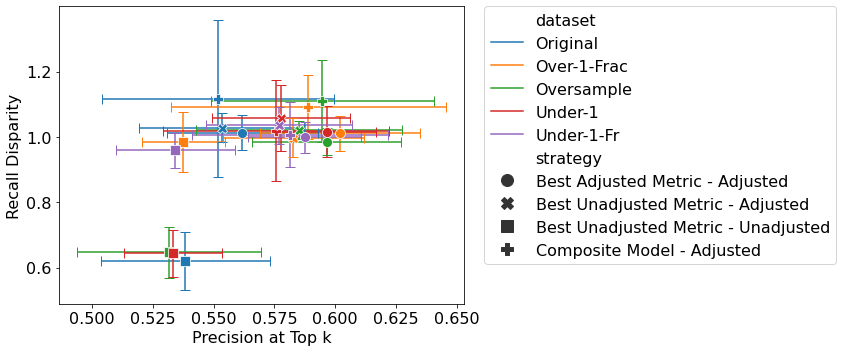

In [54]:
colorlist = sns.color_palette().as_hex()
print(colorlist)
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=comp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index(), 
              x='value', y='recall_disp', 
              hue='dataset', 
#              marker="o", 
              style='strategy',
              markers=True,
#              color='dodgerblue',
              markersize=10,
              dashes=None,
              ci=None,
              ax=ax)


for i, ds in enumerate(comp_df['dataset'].unique()):
    tmp_df = comp_df.loc[comp_df['dataset'] == ds, ].copy()
    
    x_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['value'].values)
    y_coords = list(tmp_df.groupby(['dataset', 'strategy'])[['value', 'recall_disp']].mean().reset_index()['recall_disp'].values)

    prec_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['value'].sem().values
    disp_errors = 1.96*tmp_df.groupby(['dataset', 'strategy'])['recall_disp'].sem().values
    color = colorlist[i]
    
    ax.errorbar(x_coords, y_coords, 
                xerr=prec_errors, 
                yerr=disp_errors,
        ecolor=colorlist[i], fmt=' ', zorder=-1, capsize=5)


ax.set_ylabel('Recall Disparity', fontsize=16)
ax.set_xlabel('Precision at Top k', fontsize=16)

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)


handles, labels = ax.get_legend_handles_labels()
hhandles = []
llabels = []
for i, lab in enumerate(labels):
    if lab not in list(comp_df['dataset'].unique()) + ['dataset', 'strategy']:
        handles[i].set_linestyle("")
    hhandles.append(handles[i])
    llabels.append(lab)
ax.legend(hhandles, llabels, fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., markerscale=2)
    
#ax.set_xlim([0.52, 0.58])
fig.tight_layout()

# Analyzing Individually

In [56]:
def plot(ts_df, x_plot, y_plot, algo_name):
    fig, ax = plt.subplots(figsize=(12,5))
    sns.lineplot(data=ts_df, x=x_plot, y=y_plot, hue='strategy', marker="o", ax=ax, linewidth=3.0, markersize=10)
    ax.set_ylabel(y_plot, fontsize=22)
    ax.set_xlabel('')

    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_fmt)

    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    handles, labels = ax.get_legend_handles_labels()
    hhandles = []
    llabels = []
    
    for i, lab in enumerate(labels):
        if lab not in ('strategy'):
            llabels.append(lab)
            hhandles.append(handles[i])
    ax.legend(hhandles, llabels, ncol=1, fontsize=12, loc='lower right')
    plt.tight_layout()
    plt.title(algo_name, fontsize=18)

In [58]:
import matplotlib.dates as mdates

months = mdates.MonthLocator([4,8,12])  # every month
months_fmt = mdates.DateFormatter('%b %y')

<Figure size 720x3600 with 0 Axes>

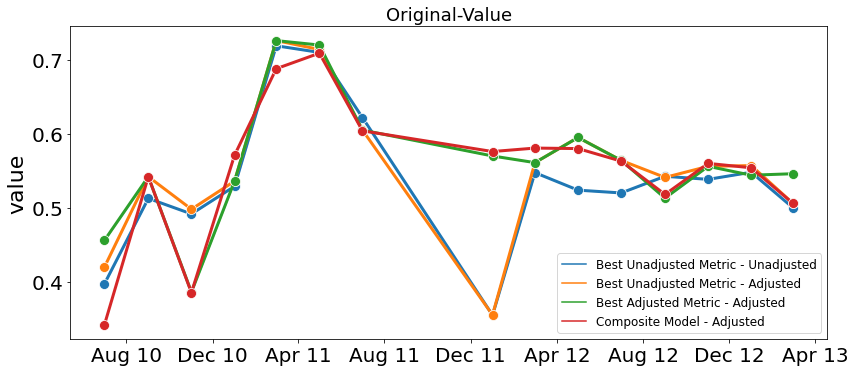

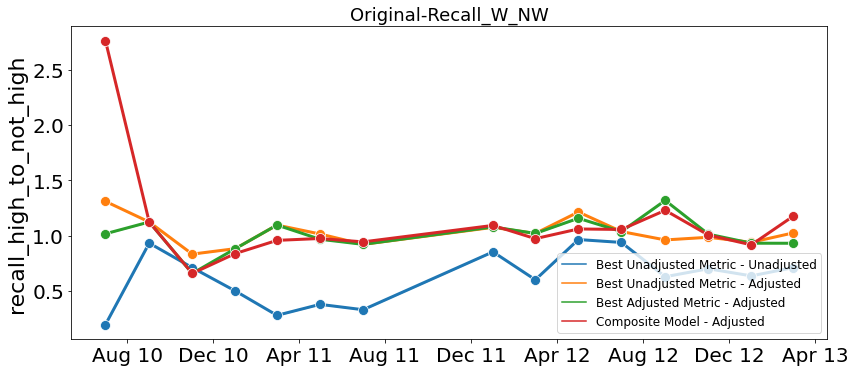

In [59]:
plt.figure(figsize=(10,50))
plot(ts_df_orig, 'train_end_time', 'value', 'Original-Value')
plot(ts_df_orig, 'train_end_time', 'recall_high_to_not_high', 'Original-Recall_W_NW')

<Figure size 720x3600 with 0 Axes>

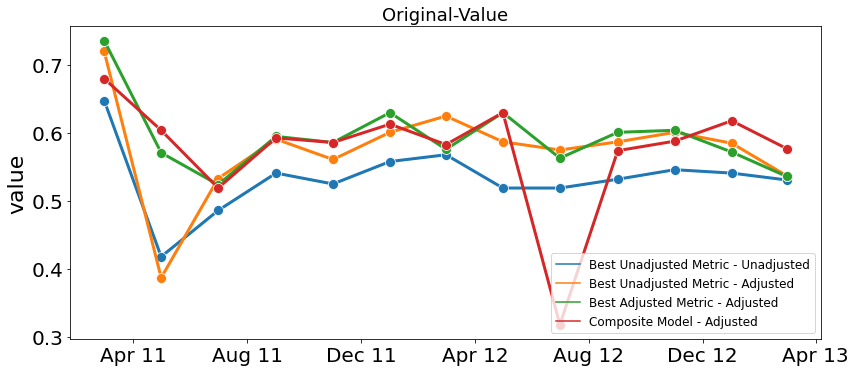

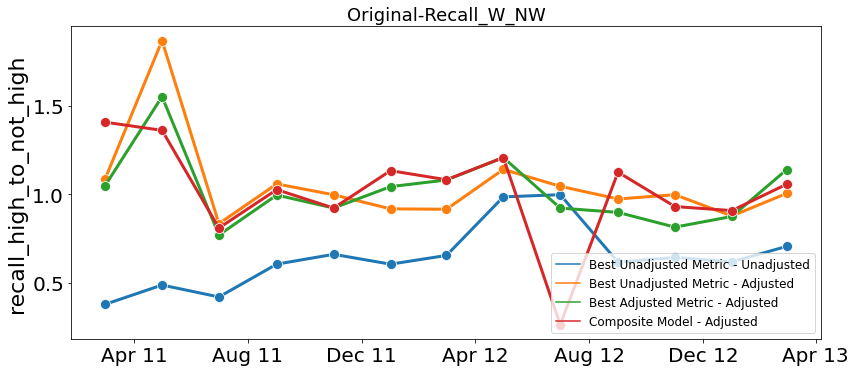

In [60]:
plt.figure(figsize=(10,50))
plot(ts_df_us, 'train_end_time', 'value', 'Original-Value')
plot(ts_df_us, 'train_end_time', 'recall_high_to_not_high', 'Original-Recall_W_NW')

<Figure size 720x3600 with 0 Axes>

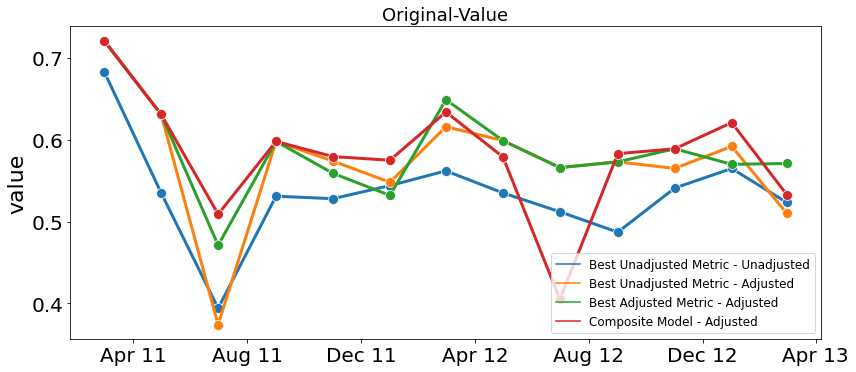

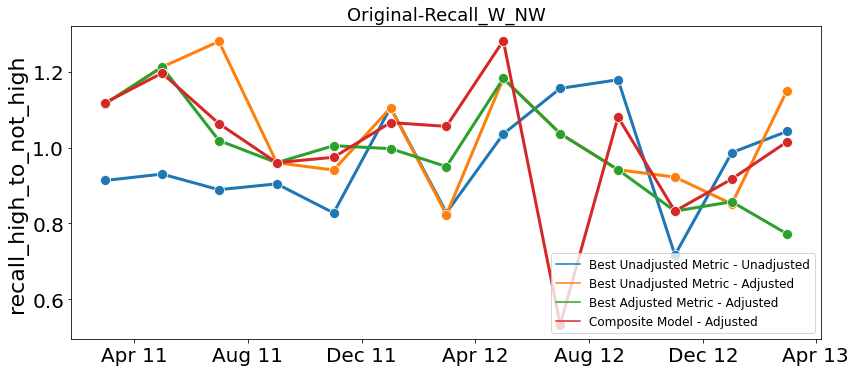

In [61]:
plt.figure(figsize=(10,50))
plot(ts_df_us_frac, 'train_end_time', 'value', 'Original-Value')
plot(ts_df_us_frac, 'train_end_time', 'recall_high_to_not_high', 'Original-Recall_W_NW')

<Figure size 720x3600 with 0 Axes>

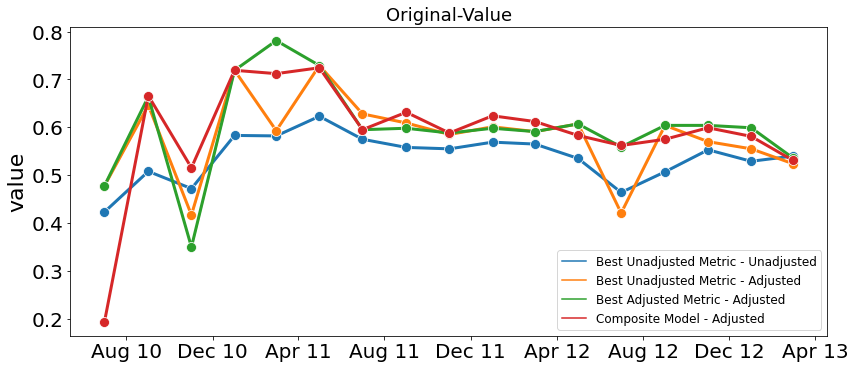

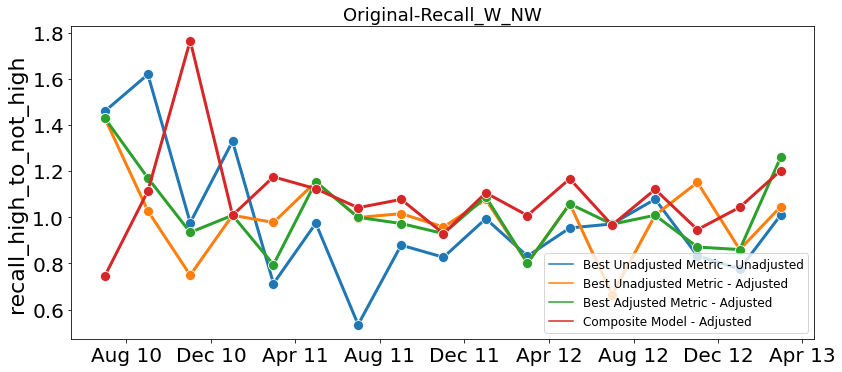

In [63]:
plt.figure(figsize=(10,50))
plot(ts_df_os_frac, 'train_end_time', 'value', 'Original-Value')
plot(ts_df_os_frac, 'train_end_time', 'recall_high_to_not_high', 'Original-Recall_W_NW')

<Figure size 720x3600 with 0 Axes>

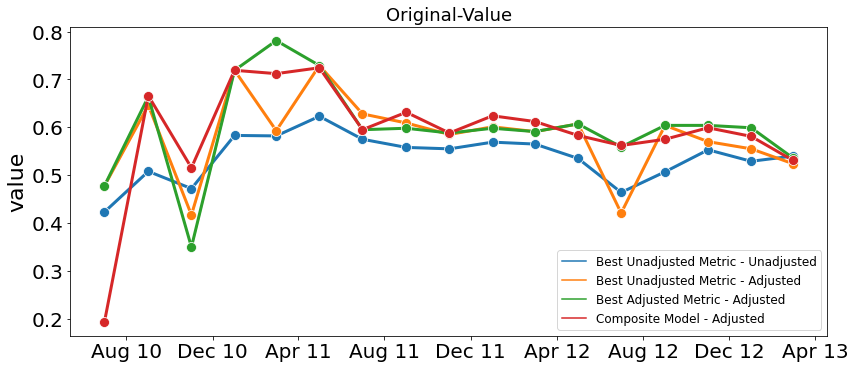

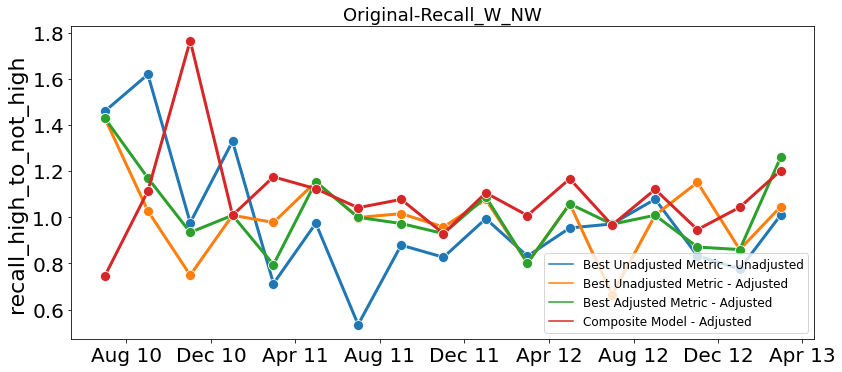

In [64]:
plt.figure(figsize=(10,50))
plot(ts_df_os_frac, 'train_end_time', 'value', 'Original-Value')
plot(ts_df_os_frac, 'train_end_time', 'recall_high_to_not_high', 'Original-Recall_W_NW')

## Original

In [6]:
import SAVE_RecallAdjuster as sra
from jinja2 import Template
import time

In [35]:
start_time = time.time()
myRA_orig = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_original',
        experiment_hashes='10ec0614881ab8f1d97754c863e39fd3',
        date_pairs=date_pairs,
        list_sizes=[10000],
        entity_demos='donors',
        demo_col='plevel',
        dataset='donors'
)
print("Time Taken="+str(time.time()-start_time))

Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=9246.154548883438


## No Protected

In [30]:
import SAVE_RecallAdjuster as sra
from jinja2 import Template
import time

In [31]:
start_time = time.time()
myRA_nop = sra.RecallAdjuster(
        engine=conn,
        pg_role='hemank',
        schema='hemank_bias_NOP',
        experiment_hashes='4b4dd2e1f530b5c87c7f08fc58599f13',
        date_pairs=date_pairs,
        list_sizes=[10000],
        entity_demos='donors',
        demo_col='plevel',
        dataset='d'
)
print("Time Taken="+str(time.time()-start_time))

Done creating entities
Setting demo values. Not using pre-set values
Not running subsampling OR bootstrap based models
Running Recall Adjustment
Time Taken=33.02897310256958
